In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set plot style
sns.set(style="whitegrid")

In [4]:
# Step 2: Import the Dataset
# Make sure that cost_analytics_data.csv is in your working directory

# Import the CSV file and assign it to df_dataset
df_dataset = pd.read_csv(link to the file path)

# Verify the data by printing the first few rows
print(df_dataset.head())

  Product ID        Date  Cost of Goods Sold  Current Price  Competitor Price  \
0       P001  2025-01-01                  48          53.86             55.24   
1       P001  2025-01-02                  48          52.19             54.17   
2       P001  2025-01-03                  48          53.70             55.28   
3       P001  2025-01-04                  48          53.67             54.49   
4       P001  2025-01-05                  48          52.29             55.38   

   Sales Volume  
0            15  
1             8  
2            15  
3            13  
4             1  


Descriptive Statistics:


,Cost of Goods Sold,Current Price,Competitor Price,Sales Volume
count,600.000000,600.000000,600.000000,600.000000
mean,31.900000,43.598950,43.449500,10.693333
std,11.675496,9.862794,10.335292,5.892126
min,11.000000,24.740000,26.060000,1.000000
25%,23.000000,37.030000,36.385000,6.000000
50%,32.500000,42.855000,43.115000,11.000000
75%,40.500000,51.652500,51.100000,16.000000
max,49.000000,64.270000,65.280000,20.000000


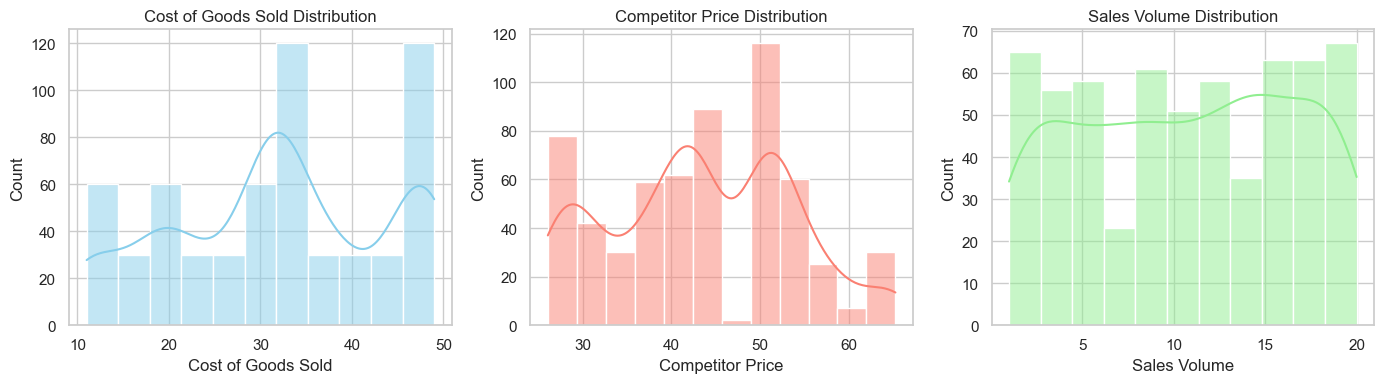

In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Let's check some descriptive statistics of the dataset.
print("Descriptive Statistics:")
display(df_dataset.describe())

# Optionally, plot the distribution of key variables:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_dataset['Cost of Goods Sold'], kde=True, color='skyblue')
plt.title("Cost of Goods Sold Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df_dataset['Competitor Price'], kde=True, color='salmon')
plt.title("Competitor Price Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df_dataset['Sales Volume'], kde=True, color='lightgreen')
plt.title("Sales Volume Distribution")

plt.tight_layout()
plt.show()

In [6]:
# Step 4: Define Features and Target Variable
# We will use "Cost of Goods Sold", "Competitor Price", and "Sales Volume" as features
# and "Current Price" as the target to predict.
features = ['Cost of Goods Sold', 'Competitor Price', 'Sales Volume']
target = 'Current Price'

X = df_dataset[features]
y = df_dataset[target]

In [7]:
# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 480
Testing set size: 120


In [8]:
# Step 6: Build and Train the Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print("Linear regression model trained successfully.")

Linear regression model trained successfully.


Model Evaluation Metrics:
Mean Squared Error (MSE): 1.2948025665749963
R² Score: 0.9856838375612168


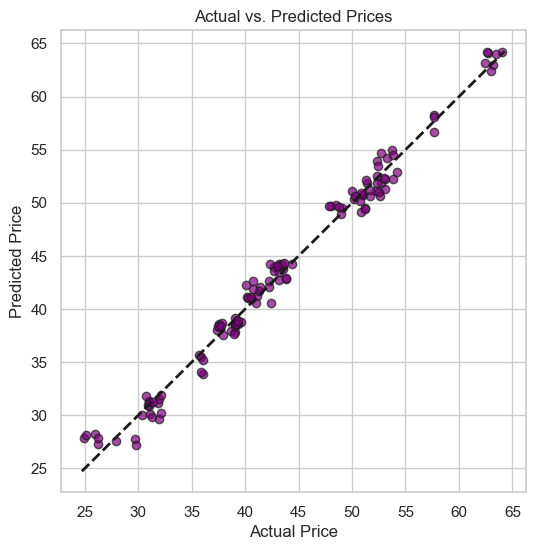

In [9]:
# Step 7: Evaluate the Model
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Visualize Actual vs. Predicted Prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7, edgecolor='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [10]:
# Step 8: Display Model Coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': reg_model.coef_
})
print("Model Coefficients:")
display(coefficients)

Model Coefficients:


,Feature,Coefficient
0,Cost of Goods Sold,0.016995
1,Competitor Price,0.931396
2,Sales Volume,0.011326


In [11]:
# Step 9: Make a Prediction for a New Product
# Example: For a product with COGS = 30, Competitor Price = 45, and Sales Volume = 10
new_product = pd.DataFrame({
    'Cost of Goods Sold': [30],
    'Competitor Price': [45],
    'Sales Volume': [10]
})

recommended_price = reg_model.predict(new_product)[0]
print("Recommended Price for new product (COGS=30, Competitor Price=45, Sales Volume=10):", round(recommended_price, 2))

Recommended Price for new product (COGS=30, Competitor Price=45, Sales Volume=10): 45.01
